In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

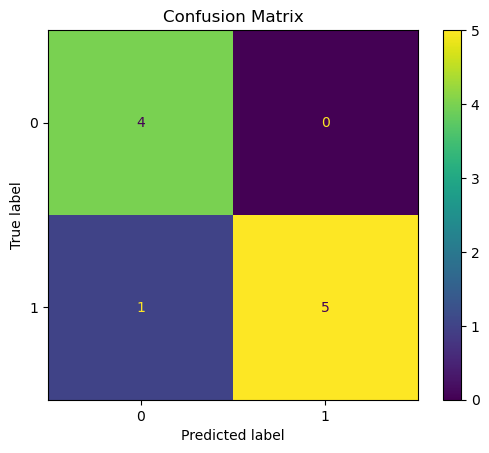

In [7]:
# 1.Confusion Matrix
# A table showing the performance of a classification model by displaying the counts of TP,TN,FP,FN predictions.
# Useful for evaluating the accuracy of classification models.

y_true = [0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
y_pred = [0, 0, 0, 1, 0, 1, 1, 0, 1, 1]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


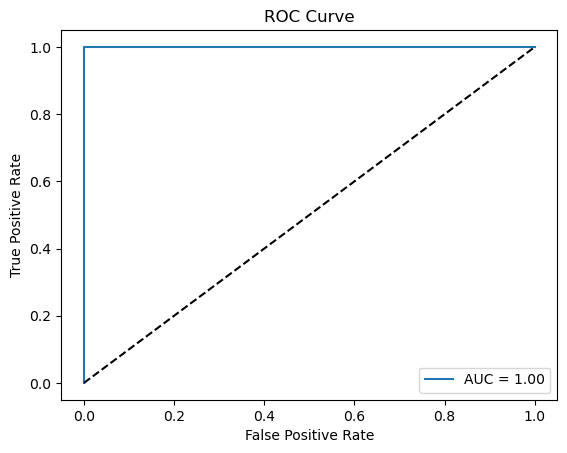

In [9]:
# 2. ROC Curve (Receiver Operating Characteristic Curve)
# plot of the true positive rate (sensitivity) versus the false positive rate (1-specificity) at various threshold settings.
# Useful for evaluating the performance of binary classifiers.

from sklearn.metrics import roc_curve, roc_auc_score
y_true = [0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8, 0.2, 0.85, 0.7, 0.1, 0.6, 0.9]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


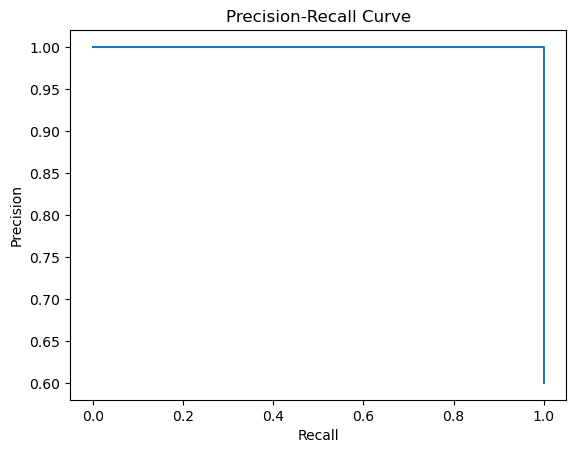

In [10]:
# 3. Precision-Recall Curve
# A plot of precision (positive predictive value) versus recall (sensitivity) for different threshold values.
# Particularly useful for imbalanced datasets where the positive class is of more interest.

from sklearn.metrics import precision_recall_curve
y_true = [0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8, 0.2, 0.85, 0.7, 0.1, 0.6, 0.9]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Plot precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


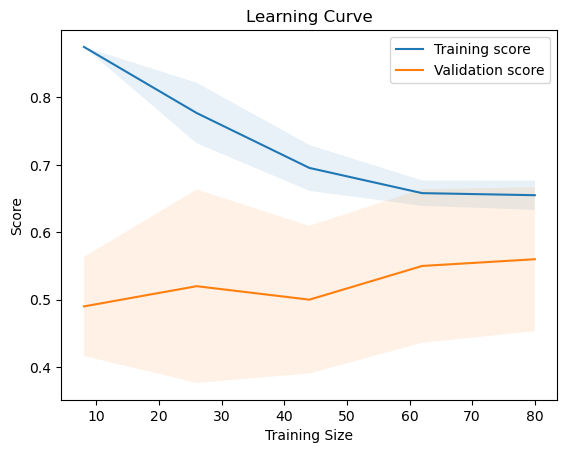

In [11]:
# 4. Learning Curve:Plots training and validation scores against the number of training samples.
# Useful for diagnosing whether the model benefits from more data or whether it suffers from high bias or variance.

from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
# Example data
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)

# Compute learning curve
train_sizes, train_scores, val_scores = learning_curve(LogisticRegression(), X, y, cv=5)

# Calculate mean and standard deviation for plotting
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curve
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1)
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


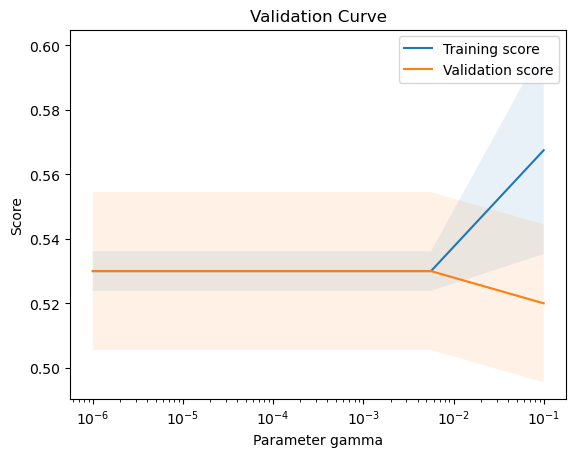

In [12]:
# 5. Validation Curve: Plots the training and validation scores against a hyperparameter.
# Useful for understanding how a model's performance changes with different values of a hyperparameter.

from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)

# Compute validation curve
param_range = np.logspace(-6, -1, 5)
train_scores, val_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_range, cv=5)

# Calculate mean and standard deviation for plotting
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot validation curve
plt.plot(param_range, train_scores_mean, label='Training score')
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.plot(param_range, val_scores_mean, label='Validation score')
plt.fill_between(param_range, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1)
plt.xlabel('Parameter gamma')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.xscale('log')
plt.legend(loc='best')
plt.show()
